# Exercise 3. Autoencoder

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

### 1. Neural Network 모델 구성

In [0]:
# Hyperparameters
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

X = tf.placeholder(tf.float32, [None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

### 1-1. Encoder


In [0]:
def encoder(X):
  "Input X가 들어왔을 때 hidden state를 return"
  return tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

### 1-2. Decoder

In [0]:
def decoder(h):
  "hidden state h가 들어왔을 때 원래 data dimension으로 decoding"
  return tf.nn.sigmoid(tf.add(tf.matmul(h, W_decode), b_decode))

### 1-3. Loss function, Optimizer 정의

In [0]:
# 각 dimension value 차이의 제곱 평균
cost = tf.reduce_mean(tf.pow(X - decoder(encoder(X)), 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 2. Training

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):

    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})

        total_cost += cost_val

    print('Epoch: ', '%04d' % (epoch+1),
          'Avg. Cost = ', '{:.4f}'.format(total_cost/total_batch))

print('최적화 완료!')

Epoch:  0001 Avg. Cost =  0.1976
Epoch:  0002 Avg. Cost =  0.0606
Epoch:  0003 Avg. Cost =  0.0501
Epoch:  0004 Avg. Cost =  0.0452
Epoch:  0005 Avg. Cost =  0.0422
Epoch:  0006 Avg. Cost =  0.0400
Epoch:  0007 Avg. Cost =  0.0385
Epoch:  0008 Avg. Cost =  0.0377
Epoch:  0009 Avg. Cost =  0.0369
Epoch:  0010 Avg. Cost =  0.0353
Epoch:  0011 Avg. Cost =  0.0349
Epoch:  0012 Avg. Cost =  0.0345
Epoch:  0013 Avg. Cost =  0.0337
Epoch:  0014 Avg. Cost =  0.0318
Epoch:  0015 Avg. Cost =  0.0305
Epoch:  0016 Avg. Cost =  0.0302
Epoch:  0017 Avg. Cost =  0.0300
Epoch:  0018 Avg. Cost =  0.0299
Epoch:  0019 Avg. Cost =  0.0297
Epoch:  0020 Avg. Cost =  0.0296
최적화 완료!


### 3. 결과 확인

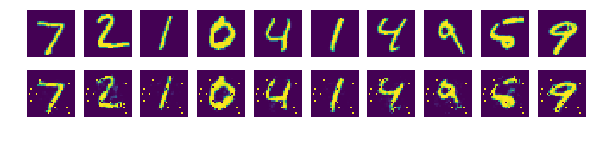

In [0]:
sample_size = 10

samples = sess.run(decoder(encoder(X)), feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):

    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
 
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()